In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,4.5)

**Implementation of extracting Countries from the main dataset**

In [2]:
class CountryDataExtractor:

    def __init__(self, dataset):
        self.dataset = dataset

    def extractCountry(self, countryCode):
        return self.dataset[self.dataset["iso_code"] == countryCode]

# **Reading Datasets (CovidData & Sentiments):**

In [4]:
#owid-covid-data
owid_covid_data = pd.read_csv('/content/drive/MyDrive/PMDSPorject/owid-covid-data.csv')
owid_covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187092,ZWE,Africa,Zimbabwe,2022-05-12,248943.0,301.0,127.571,5481.0,0.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
187093,ZWE,Africa,Zimbabwe,2022-05-13,249131.0,188.0,131.000,5482.0,1.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
187094,ZWE,Africa,Zimbabwe,2022-05-14,249206.0,75.0,141.714,5482.0,0.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
187095,ZWE,Africa,Zimbabwe,2022-05-15,249206.0,0.0,122.000,5482.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [5]:
#choosing the country
cde = CountryDataExtractor(owid_covid_data)
covidData = cde.extractCountry("USA")
covidData = covidData[covidData["date"].between('2020-03-30' , '2021-12-30')] #we can't compute seasonality starting sooner than 2020-03-30
covidData

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
176343,USA,North America,United States,2020-03-30,165698.0,22154.0,17086.000,4280.0,707.0,498.571,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
176344,USA,North America,United States,2020-03-31,192079.0,26381.0,19337.857,5359.0,1079.0,618.000,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
176345,USA,North America,United States,2020-04-01,223254.0,31175.0,22059.000,6611.0,1252.0,749.286,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
176346,USA,North America,United States,2020-04-02,255530.0,32276.0,24124.000,8142.0,1531.0,908.429,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
176347,USA,North America,United States,2020-04-03,287931.0,32401.0,26096.857,9562.0,1420.0,1036.714,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176979,USA,North America,United States,2021-12-26,52366667.0,178384.0,206643.286,815641.0,349.0,1484.714,...,19.1,24.6,NaN,2.77,78.86,0.926,961636.8,16.43,19.92,2888.53487
176980,USA,North America,United States,2021-12-27,52867228.0,500561.0,243860.000,817437.0,1796.0,1515.429,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
176981,USA,North America,United States,2021-12-28,53229260.0,362032.0,269950.571,819754.0,2317.0,1567.286,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
176982,USA,North America,United States,2021-12-29,53731365.0,502105.0,306858.571,822106.0,2352.0,1304.571,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN


In [6]:
sentimentsUS = pd.read_csv('/content/drive/MyDrive/PMDSPorject/sentimentsUS.csv')
sentimentsUS = sentimentsUS[sentimentsUS["day"].between('2020-03-30' , '2021-12-30')]
sentimentsUS

,day,timestamp,date,lang,text,day.1,text_modified,sentiment,negPercentage,netPercentage,posPercentage
47,2020-03-30,250,250,250,250,250,250,250,0.176000,0.520000,0.304000
48,2020-03-31,418,418,418,418,418,418,418,0.196172,0.526316,0.277512
49,2020-04-01,427,427,427,427,427,427,427,0.170960,0.540984,0.288056
50,2020-04-02,476,476,476,476,476,476,476,0.170168,0.478992,0.350840
51,2020-04-03,468,468,468,468,468,468,468,0.202991,0.523504,0.273504
...,...,...,...,...,...,...,...,...,...,...,...
683,2021-12-26,66,66,66,66,66,66,66,0.166667,0.530303,0.303030
684,2021-12-27,105,105,105,105,105,105,105,0.247619,0.580952,0.171429
685,2021-12-28,130,130,130,130,130,130,130,0.284615,0.492308,0.223077
686,2021-12-29,140,140,140,140,140,140,140,0.271429,0.485714,0.242857


# **Sentiments Seasonality:**

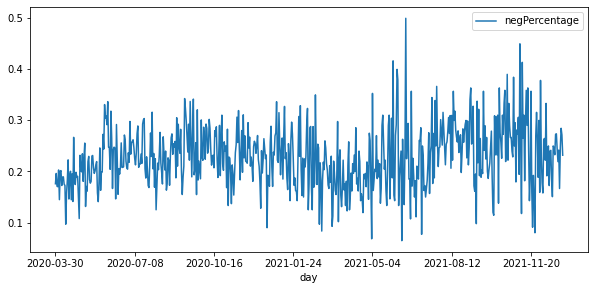

In [7]:
sentimentsUS.plot('day', 'negPercentage')

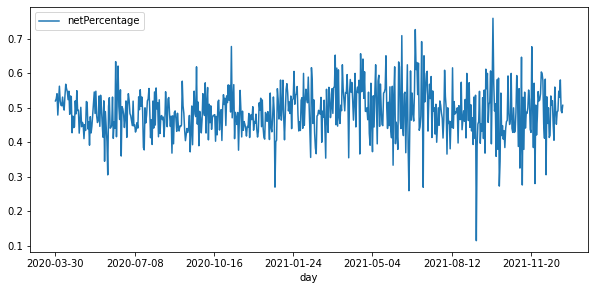

In [8]:
sentimentsUS.plot('day', 'netPercentage')

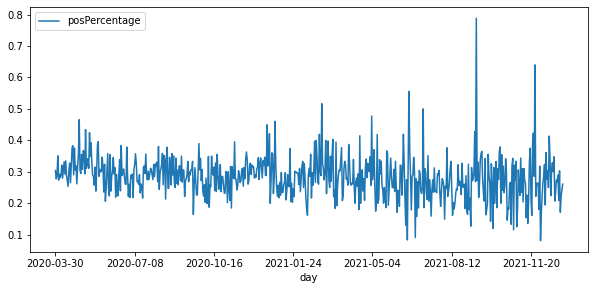

In [9]:
sentimentsUS.plot('day', 'posPercentage')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


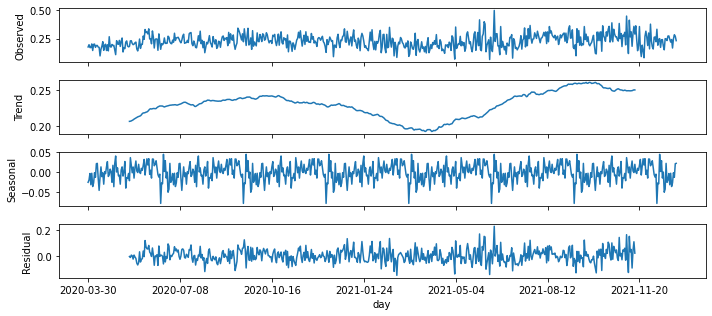

In [10]:
#Seasonality on negPercentage
sentimentsUS_negPercentage = sentimentsUS[['day','negPercentage']].dropna() #8 of them were NaN, so I dropped them


from statsmodels.tsa.seasonal import seasonal_decompose
sentimentsUS_negPercentage.set_index('day', inplace=True)
analysis = sentimentsUS_negPercentage[['negPercentage']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="additive", freq = 90)
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

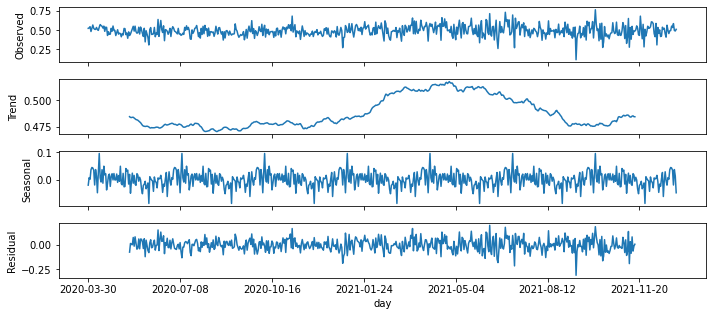

In [11]:
#Seasonality on netPercentage
sentimentsUS_netPercentage = sentimentsUS[['day','netPercentage']].dropna() #8 of them were NaN, so I dropped them

from statsmodels.tsa.seasonal import seasonal_decompose
sentimentsUS_netPercentage.set_index('day', inplace=True)
analysis = sentimentsUS_netPercentage[['netPercentage']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="additive", freq = 90)
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

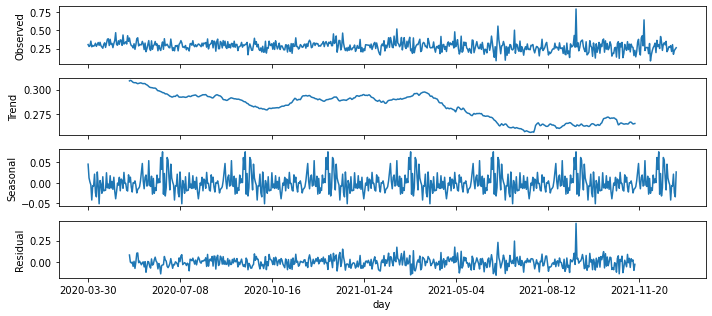

In [12]:
#Seasonality on posPercentage
sentimentsUS_posPercentage = sentimentsUS[['day','posPercentage']].dropna() #some of them were NaN, so I dropped them

from statsmodels.tsa.seasonal import seasonal_decompose
sentimentsUS_posPercentage.set_index('day', inplace=True)
analysis = sentimentsUS_posPercentage[['posPercentage']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="additive", freq = 90)
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

# **Feature "new_deaths" is chosen to compare its trend with sentiment trends**

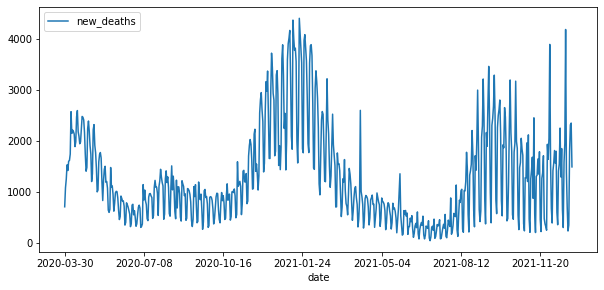

In [17]:
covidData.plot("date","new_deaths")

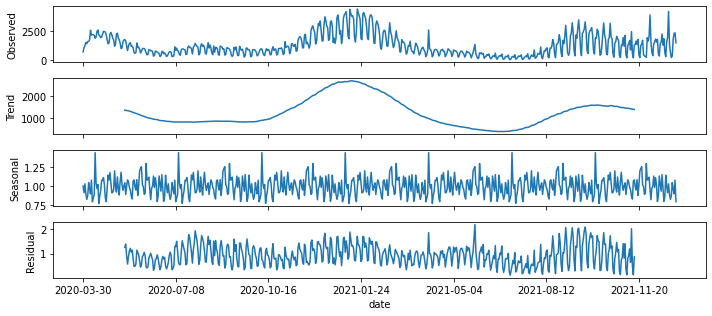

In [21]:
"""new_death Seasonality"""
covidDataUS_death = covidData[['date','new_deaths']].dropna()

from statsmodels.tsa.seasonal import seasonal_decompose
covidDataUS_death.set_index('date', inplace=True)
analysis = covidDataUS_death[['new_deaths']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", freq = 90 )
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

# **Feature "new_cases" is chosen to compare its trend with sentiment trends**

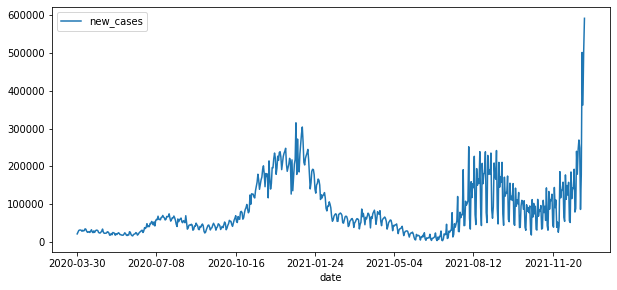

In [19]:
covidData.plot("date","new_cases")

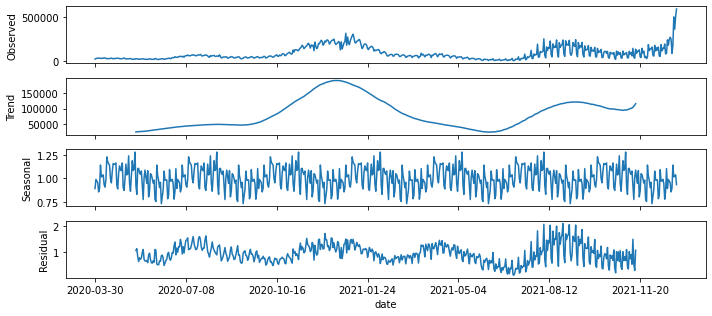

In [22]:
"""new_cases Seasonality"""
covidDataUS_case = covidData[['date','new_cases']].dropna()

from statsmodels.tsa.seasonal import seasonal_decompose
covidDataUS_case.set_index('date', inplace=True)
analysis = covidDataUS_case[['new_cases']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", freq = 90 )
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

# **Feature "hosp_patients" is chosen to compare its trend with sentiment trends**

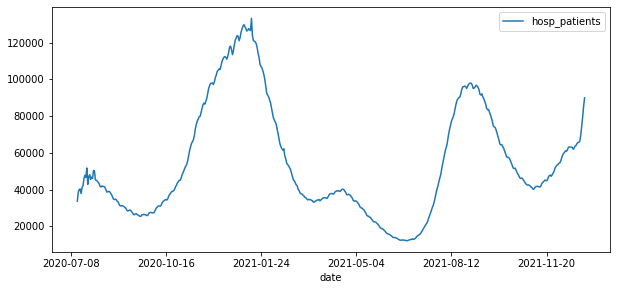

In [169]:
covidData.plot("date","hosp_patients")

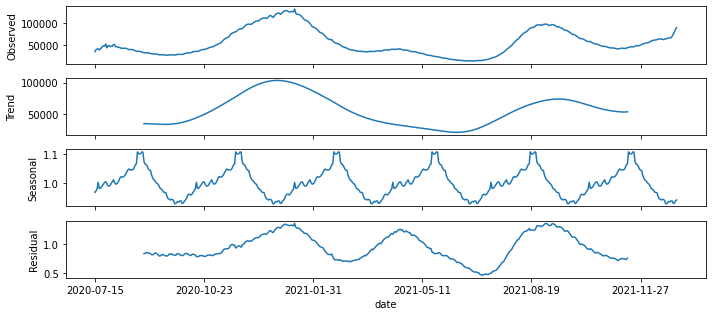

In [23]:
"""hosp_patients Seasonality"""
covidDataUS_hosp = covidData[['date','hosp_patients']].dropna()

from statsmodels.tsa.seasonal import seasonal_decompose
covidDataUS_hosp.set_index('date', inplace=True)
analysis = covidDataUS_hosp[['hosp_patients']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", freq = 90 )
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

# **Feature "new_vaccinations" is chosen to compare its trend with sentiment trends**

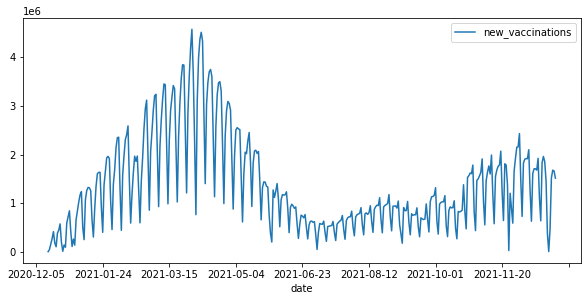

In [24]:
covidData.plot("date","new_vaccinations")

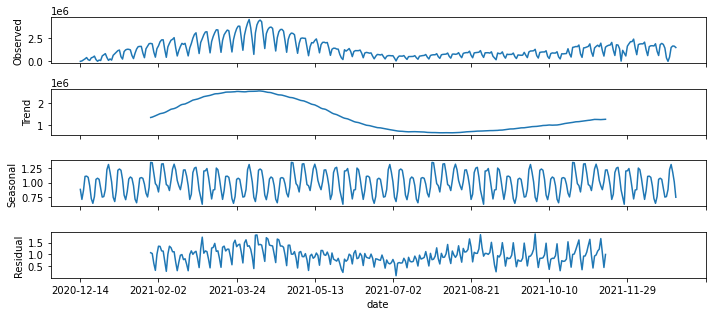

In [25]:
"""new_vaccinations Seasonality"""
covidDataUS_vacc = covidData[['date','new_vaccinations']].dropna()

from statsmodels.tsa.seasonal import seasonal_decompose
covidDataUS_vacc.set_index('date', inplace=True)
analysis = covidDataUS_vacc[['new_vaccinations']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", freq = 90 )
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();

# **Feature "icu_patients" is chosen to compare its trend with sentiment trends**

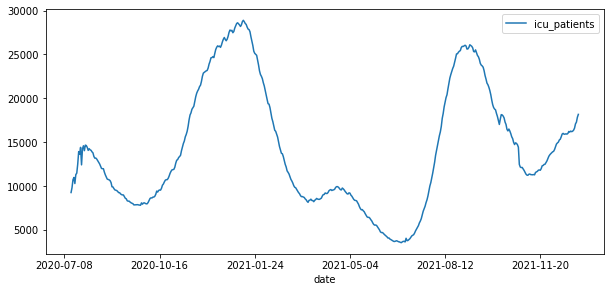

In [26]:
covidData.plot("date","icu_patients")

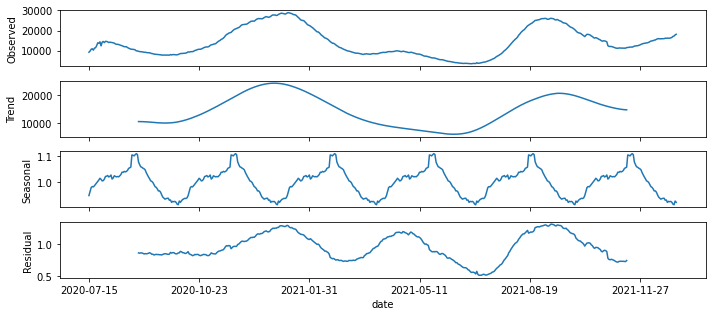

In [27]:
"""icu_patients Seasonality"""
covidDataUS_icu = covidData[['date','icu_patients']].dropna()

from statsmodels.tsa.seasonal import seasonal_decompose
covidDataUS_icu.set_index('date', inplace=True)
analysis = covidDataUS_icu[['icu_patients']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", freq = 90 )
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot();